<img style="margin: 0 auto;" src="https://desafiolatam.com/assets/home/logo-academia-bla-790873cdf66b0e681dfbe640ace8a602f5330bec301c409744c358330e823ae3.png">

In [1]:
#Se importan las principales librerías a utilizar

import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import missingno as msgn

#Se importa la librería para ignorar los mensajes de advertencia 
import warnings
warnings.filterwarnings("ignore")

### Hito 1: Sesión Presencial 1, Unidad 7
Completar el punto de Preliminares, así como Aspectos computacionales.
* Elementos a considerar en éste hito:
    * Los dos enunciados deben estar clarificados, considerando el tipo de problema a resolver (regresión o clasificación). Para cada uno de los enunciados y su problema identificado, se debe justificar el uso de métricas para medir el desempeño del problema. (3 puntos)
    * Se debe considerar el uso de las librerías asociadas para la ingesta, preprocesamiento, visualización y modelación, así como métricas de evaluación. (1 punto)
    * Se debe detallar y considerar el proceso de preprocesamiento y recodificación de datos. (1punto)
* Entregable: Dos notebooks (uno por enunciado) con todos los puntos detallados.

### Desafío 1: Determinantes del ingreso
#### Enunciado
Usted trabaja para un  organismo no  gubernamental que está interesado en  las  dinámicas socioeconómicas que determinan la desigualdad de ingreso y la erradicación de la pobreza extrema,enmarcado dentro de los objetivos del desarrollo del nuevo milenio del Programa de las NacionesUnidas para el  Desarrollo. Le  encomiendan el  desarrollo de  un  modelo predictivo  sobre la probabilidad que un individuo presente salarios por sobre o bajo los 50.000 dólares anuales, en basea una serie de atributos sociodemográficos.
#### Aspectos adicionales a considerar
* La base de datos contiene los valores perdidos como '?'. Deberá transformarlos para poder trabajar de forma adecuada.


In [2]:
#Primero se lee el archivo 'income-df.csv' y se mostrarán algunos valores de ciertas series
df = pd.read_csv('income-db.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
#Para ver el tamaño de nuestro DataFrame
print(df.shape) 

(48842, 15)


In [4]:
#El archivo contiene 15 columnas y 48842 filas. Para reemplazar los valores perdidos,debemos utilizar el método .replace() 
#de la siguiente forma:

df_subset = df.replace('?', np.nan)

In [5]:
#Utilizaremos el método .info() el cual nos imprimirá información de nuestro DataFrame
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          46043 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         46033 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     47985 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
"""
Según lo reportado por el método Info del DataFrame, las columnas "workclass", "occupation", y "native-country" tienen valores
N/A

Una forma de visualizar la cantidad de valores perdidos es mediante la incorporación de la librería missingno
"""

'\nSegún lo reportado por el método Info del DataFrame, las columnas "workclass", "occupation", y "native-country" tienen valores\nN/A\n\nUna forma de visualizar la cantidad de valores perdidos es mediante la incorporación de la librería missingno\n'

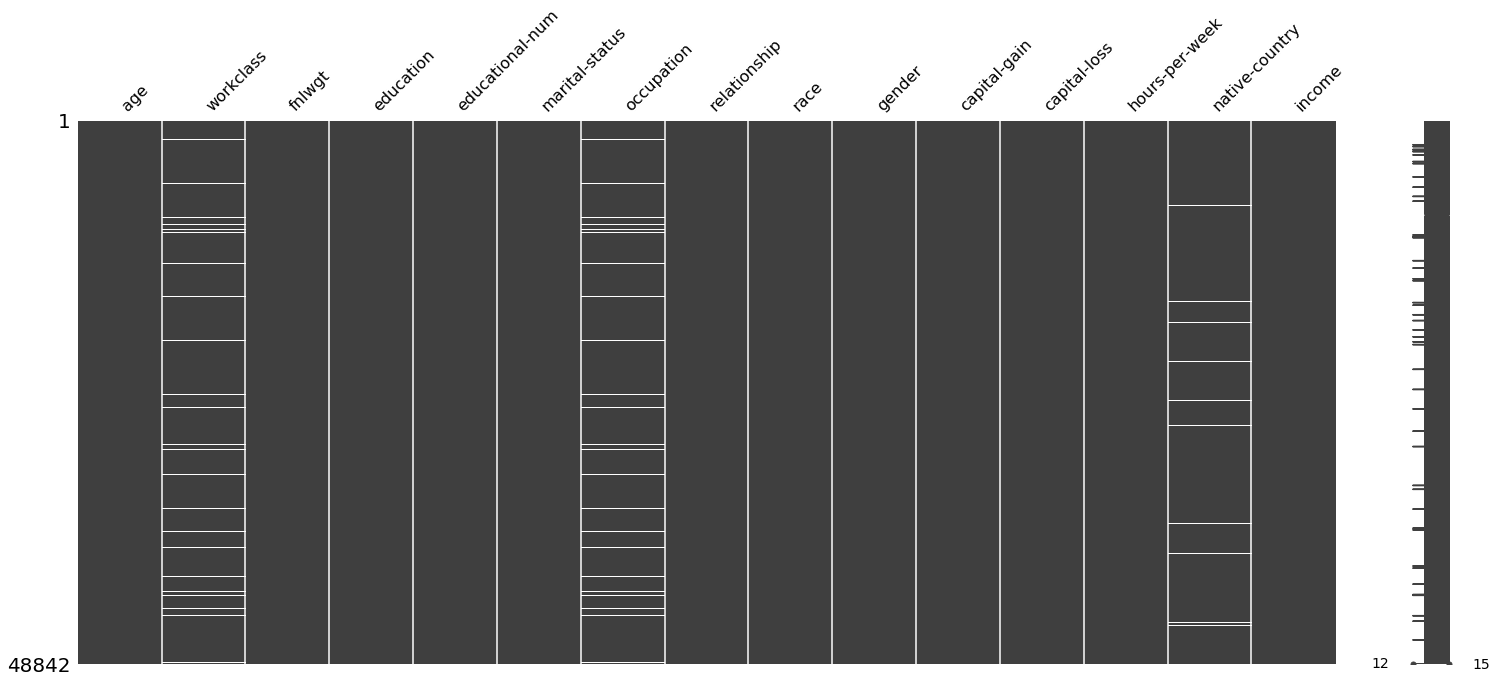

In [7]:
msgn.matrix(df_subset)

In [8]:
"""
Esto nos muestra un reporte gráfico sobre el cual que items, podemos encontrar una mayor cantidad de valores perdidos.

Tal como se ve en el gráfico del Out[7] la cantidad de datos perdidos se concentran en las columnas de "Worclass","occupation" 
y "Native-country". Para observar la cantidad de datos perdidos respecto a la cantidad total, hacemos lo siguiente:

"""

'\nEsto nos muestra un reporte gráfico sobre el cual que items, podemos encontrar una mayor cantidad de valores perdidos.\n\nTal como se ve en el gráfico del Out[7] la cantidad de datos perdidos se concentran en las columnas de "Worclass","occupation" \ny "Native-country". Para observar la cantidad de datos perdidos respecto a la cantidad total, hacemos lo siguiente:\n\n'

In [9]:
non_nan_workclass_rows = len(df_subset[df_subset['workclass'].isna()])
total_rows = len(df_subset)
print(f"El porcentaje de datos perdidos de la variable Workclass es: {round(non_nan_workclass_rows/total_rows * 100, 2)}%")

El porcentaje de datos perdidos de la variable Workclass es: 5.73%


In [10]:
non_nan_occupation_rows = len(df_subset[df_subset['occupation'].isna()])
print(f"El porcentaje de datos perdidos de la variable Occupation es: {round(non_nan_occupation_rows/total_rows * 100, 2)}%")

El porcentaje de datos perdidos de la variable Occupation es: 5.75%


In [11]:
non_nan_native_country_rows = len(df_subset[df_subset['native-country'].isna()])
print(f"El porcentaje de datos perdidos de la variable Native Country es: {round(non_nan_native_country_rows/total_rows * 100, 2)}%") 

El porcentaje de datos perdidos de la variable Native Country es: 1.75%


In [12]:
dropped_df = df_subset.dropna()
print(f"El porcentaje de datos perdidos si eliminamos todos los N/A es de: {round(len(dropped_df)/len(df_subset)*100, 2)}%")

El porcentaje de datos perdidos si eliminamos todos los N/A es de: 92.59%


#####  Como los datos perdidos representan un poco más del 7% de la muestra consideramos que eliminarlos seria un error, por lo que optamos por dejarlos como valores nulos para despues poder seguir usando la serie aunque esta tenga un valor nulo que puede ser dropeado

* Desde la organización le sugieren que debe recodificar las siguientes variables acorde a las siguientes nomenclaturas:
    * occupation debe recodificarse como collars siguiendo una nomenclatura similar a:
        * white-collar $\leftarrow$ Prof-specialty, Exec-managerial, Adm-clerical, Sales,Tech-support.
        * blue-collar $\leftarrow$ Craft-repair, Machine-op-inspct, Transport-moving,Handlers-cleaners, Farming-fishing, Protective-serv, Priv-house-serv.
        * others $\leftarrow$ Other-service, Armed-Forces.
    * workclass debe recodificarse como workclass_recod siguiendo una nomenclatura similar a:
        * federal-gov $\leftarrow$ Federal-gov.
        * state-level-gov $\leftarrow$ State-gov, Local-gov.
        * self-employed $\leftarrow$ Self-emp-inc, Self-emp-not-inc
        * unemployed $\leftarrow$ Never-worked, Without-pay.
    * education debe recodificarse como educ_recod siguiendo una nomenclatura similar a:
        * preschool$\leftarrow$ Preschool
        * elementary-school$\leftarrow$ 1st-4th, 5th-6th
        * high-school$\leftarrow$ 7th-8th, 9th, 10th,11th, 12th, HS-grad
        * college$\leftarrow$ Assoc-voc, Assoc-acdm, Some-college
        * university$\leftarrow$ Bachelors, Masters, Prof-school, Doctorate
    * marital-status  debe recodificarse como civstatus  siguiendo una  nomenclaturasimilar a:
        * married$\leftarrow$ Married-civ-spouse, Married-spouse-absent, Married-AF-spouse
        * divorced$\leftarrow$ Divorced
        * separated$\leftarrow$ Separated
        * widowed$\leftarrow$ Widowed
    * native-country debe recodificarse como region donde cada país debe asignarse a uno de los 5 continentes
    * income debe recodificarse de forma binaria.

### Recodificacion de Occupation:

In [13]:
#La primera columna a recodificar es Occupation. Para ello veremos la cantidad de variables que se encuentran dentro de 
#la columna. 
df_subset['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [14]:
#Luego recodificaremos todas las variables:

df_subset['occupation'] = df_subset['occupation'].replace([
    #white-collar
    'Prof-specialty', 'Exec-managerial', 'Adm-clerical','Sales','Tech-support',
    #blue-collar
    'Craft-repair','Machine-op-inspct','Transport-moving','Handlers-cleaners', 'Farming-fishing','Protective-serv','Priv-house-serv',
    #others
    'Other-service', 'Armed-Forces'
],
[   #white-collar
    'white-collar','white-collar','white-collar','white-collar', 'white-collar',
    #blue-collar
    'blue-collar', 'blue-collar', 'blue-collar','blue-collar', 'blue-collar', 'blue-collar', 'blue-collar',
    #others
    'others', 'others'
])



In [15]:
#Luego para verificar la recodificación de las variables:

In [16]:
df_subset['occupation'].value_counts()

white-collar    24819
blue-collar     16276
others           4938
Name: occupation, dtype: int64

### Recodificacion de Workclass:

In [17]:
#Para las siguiente columnas se hará el mismo procedimiento
df_subset['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [18]:
df_subset['workclass'] = df_subset['workclass'].replace([
    'Federal-gov',
    'State-gov', 'Local-gov',
    'Self-emp-inc', 'Self-emp-not-inc',
    'Never-worked', 'Without-pay'
],
[
    'federal-gov','state-level-gov', 'state-level-gov',
    'self-employed', 'self-employed', 'unemployed', 'unemployed'
])

In [19]:
df_subset['workclass'].value_counts()

Private            33906
self-employed       5557
state-level-gov     5117
federal-gov         1432
unemployed            31
Name: workclass, dtype: int64

### Recodificacion de Education:

In [20]:
df_subset['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [21]:
df_subset['education'] = df_subset['education'].replace([
    'Preschool',
    '1st-4th', '5th-6th',
    '7th-8th', '9th', '10th','11th', '12th', 'HS-grad',
    'Assoc-voc', 'Assoc-acdm', 'Some-college',
    'Bachelors', 'Masters', 'Prof-school', 'Doctorate'
],
[
    'preschool', 
    'elementary-school', 'elementary-school',
    'high-school', 'high-school', 'high-school','high-school', 'high-school', 'high-school',
    'college', 'college', 'college',
    'university', 'university', 'university', 'university'
])

In [22]:
df_subset['education'].value_counts()

high-school          21353
college              14540
university           12110
elementary-school      756
preschool               83
Name: education, dtype: int64

### Recodificacion de Marital Status:

In [23]:
df_subset['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [24]:
df_subset['marital-status'] = df_subset['marital-status'].replace([
    'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse',
    'Divorced',
    'Separated',
    'Widowed'
],
[
    'married','married', 'married',
    'divorced',
    'separated',
    'widowed'
])

In [25]:
df_subset['marital-status'].value_counts()

married          23044
Never-married    16117
divorced          6633
separated         1530
widowed           1518
Name: marital-status, dtype: int64

### Recodificacion de Native Country:

In [26]:
df_subset['native-country'].value_counts()

United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                             46
Ecuador                     

In [27]:
df_subset['native-country'] = df_subset['native-country'].replace ([
    'United-States', 'Peru', 'Guatemala', 'Mexico','Dominican-Republic',
    'El-Salvador', 'Puerto-Rico', 'Columbia', 'Cuba', 'Canada',
    'Nicaragua', 'Honduras','Jamaica','Ecuador', 'Haiti','Trinadad&Tobago',
    'Outlying-US(Guam-USVI-etc)',
    #europa
    'Ireland', 'Germany','Poland', 'England', 'Italy', 'Portugal',
    'Scotland', 'Yugoslavia', 'Hungary', 'Greece', 'France', 'Holand-Netherlands',
    #asia
    'Philippines', 'Thailand', 'Vietnam',
    'South', 'Japan', 'India', 'Cambodia', 'Laos', 'Taiwan', 'China',
    'Iran', 'Hong', 'Philippines'
],
[
    'america', 'america','america', 'america', 'america',
    'america', 'america', 'america', 'america', 'america',
    'america','america','america','america', 'america', 'america',
    'america',
    #europa
    'europa', 'europa', 'europa', 'europa', 'europa', 'europa',
    'europa', 'europa', 'europa', 'europa', 'europa', 'europa',
    #asia
    'asia', 'asia', 'asia',
    'asia', 'asia', 'asia', 'asia', 'asia', 'asia', 'asia',
    'asia', 'asia', 'asia'
])

In [28]:
df_subset['native-country'].value_counts()

america    46109
asia        1096
europa       780
Name: native-country, dtype: int64

### Recodificacion de Income:

In [29]:
df_subset['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [30]:
df_subset['income'] = np.where(df_subset['income'] == '>50K', 1, 0)

In [31]:
df_subset['income'].value_counts()

0    37155
1    11687
Name: income, dtype: int64

## Renombrando las columnas:

In [32]:
#Finalmente debemos renombrar el nombre de las columnas

In [33]:
df_subset.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [34]:
df_subset.columns = [
    'age', 'workclass_recod', 'fnlwgt', 'educ_recod', 'educational-num',
    'civstatus', 'collars', 'relationship', 'race', 'gender',
    'capital-gain', 'capital-loss', 'hours-per-week', 'region',
    'income'
]
df_subset.columns

Index(['age', 'workclass_recod', 'fnlwgt', 'educ_recod', 'educational-num',
       'civstatus', 'collars', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'region', 'income'],
      dtype='object')

In [35]:
df_subset.sample(5)

,age,workclass_recod,fnlwgt,educ_recod,educational-num,civstatus,collars,relationship,race,gender,capital-gain,capital-loss,hours-per-week,region,income
27462,47,self-employed,318593,high-school,9,married,white-collar,Husband,White,Male,0,0,25,america,0
14463,30,federal-gov,195337,high-school,9,Never-married,white-collar,Unmarried,Other,Female,1506,0,45,america,0
44371,45,Private,122195,high-school,9,widowed,blue-collar,Unmarried,Black,Female,0,0,40,america,0
14284,33,Private,393702,college,11,divorced,white-collar,Unmarried,White,Female,0,0,40,america,0
47352,42,Private,176716,university,14,Never-married,white-collar,Not-in-family,White,Male,0,0,40,america,1


In [ ]:
### Hito 2: Sesión Presencial 2, Unidad 7
Completar el punto de Descripción.
* Elementos a considerar en éste hito:
    * La inspección visual del vector objetivo. (2 puntos)
    * La inspección visual de las variables. (2 punto)
    * La inspección de datos perdidos en las variables. (1punto)
    * De ser necesario, se puede iterar en el proceso de preprocesamiento y recodificación de las variables 
* Entregable: Dos notebooks (uno por enunciado) con todos los puntos detallados e interpretados. De ser necesario, un archivo con extensión `.py` con todas las funciones implementadas

In [36]:
#Primeramente, importaremos las principales librerías para graficar, además, generaremos 

import missingno as msng
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5, 3)

In [37]:
#Primeramente, generaremos gráficos para conocer la cantidad de valores perdidos en las columnas de mayor interes
#que en este caso serían las columnas "workclass", "occupation", "native-country"

### Hito 3: Sesión Presencial 1, Unidad 8
Completar el punto de Modelación descriptiva.
* Elementos a considerar en éste hito:
    * La modelación mediante regresión de ambos problemas. (2 puntos)
    * La interpretación de los principales regresores en cada problema. (2 punto)
    * La definición de las estrategias de Modelación predictiva. (1punto)
    
* Entregable: Dos notebooks (uno por enunciado) con todos los puntos detallados e interpretados. De ser necesario, un archivo con extensión `.py` con todas las funciones implementadas

En el enunciado se pide un modelo predictivo sobre la probabilidad de que un individuo presente salarios por sobre o bajo
los $50.000$ dolares anuales en base a una serie de atributos sociodemográficos. Es decir, buscaremos una relación entre la 
columna `income` con cada una de las siguiente columnas 

-`age`
-workclass
-education
-capital-gains
-capital-losses
-fnlwgt
-marital-status
-occupation
-relationship
-race
-sex
-hours-per-week
-native-country

Primeramente debemos tener en consideración que la columna independiente "income" al ser binarizada, debemos utilizar 
la Regresión con una variable binaria. Utilizemos la columna "age"
"""
#Primero debemos importar el módulo formula.api de la librería statsmodels, el cual nos permitirá añadir
#una constante a nuestros datos 
import statsmodels.formula.api as smf

#### La función a grafícar será: 

$$
income = \beta_{0} + \gamma_{1} \times age + \epsilon_{i}
$$

donde $\beta_{0}$ es nuetro parámetro estimado para el intercepto, $\gamma$ es el parámetro estimado para la pendiente



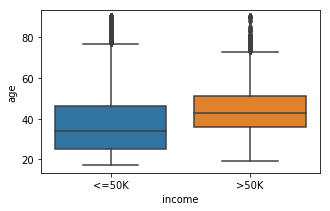

In [46]:
#Luego grafiquemos un boxplot

    sns.boxplot(x=df["income"], y=df["age"])

Acá se observa que a medida de que la edad aumenta, el sueldo anual es mayor.

In [ ]:
#Luego, si queremos estimar el efecto de un atrbuto binario en nuestra variable objetivo. 